# Self Organizing Maps
- Author: Maurice Roots
- Date Created: 2026-02-12 20:11
- Last Updated: 2026-02-12 20:11
---

---
### Abstract

We’ll build:

1. Concept summary
2. Mathematical formulation
3. From-scratch NumPy implementation
4. Toy example
5. Visualization

---
### Reference
- https://www.youtube.com/watch?v=c1coFkBBhhU
- https://www.youtube.com/watch?v=0qtvb_Nx2tA
- https://www.youtube.com/watch?v=_xUMTkrzofA
- https://www.youtube.com/watch?v=XF1V8Af1i7c
- https://link.springer.com/article/10.1007/s00521-024-09793-w
- https://www.mdpi.com/2071-1050/14/16/10369
- https://journals.ametsoc.org/view/journals/aies/4/2/AIES-D-24-0023.1.xml
- https://cms.gnest.org/sites/default/files/cest2019_00611_oral_paper.pdf

### What is a Self Organzing Map? 

A **Self Organizing Map** (SOM) is:
- An unsupervised machine learning algorithm
- A topology-preserving mapping
- A structure form of vector quantization

##### Key Idea
We map high-dimensional data $\quad x \in \mathbb{R}^d \quad $ onto a 2D grid of neurons.

Each neuron has $\quad w_i \in \mathbb{R}^d \quad $ and represents a prototype pattern.

---

##### Core Algorithm

<div style="line-height:2;">

For each input sample we:

- **_Find Best Matching Unit_** (BMU):
  - $ \text{BMU} = \arg\min_i |x - w_i| $

- **_Update BMU and Neighbors_** <br>
  - $ w_i(t+1) = w_i(t) + \eta(t), h_{bi}(t),(x - w_i(t)) $
    - Where: 
      - $ \eta(t) = learning-rate \quad $ 
      - $ h_{bi}(t) = neighborhood-function $
    - Gaussian neighborhood function:
      - $
h_{bi}(t) =
\exp\left(
-\frac{|r_b - r_i|^2}{2\sigma(t)^2}
\right)
$

</div>





### 🧠 Implementation From Scratch (NumPy Only)
---

In [38]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [39]:
class SOM:
    def __init__(self, m, n, dim, learning_rate=0.5, sigma=None, epochs=100):
        self.m = m                      # grid height
        self.n = n                      # grid width
        self.dim = dim                  # data dimension
        self.lr = learning_rate
        self.epochs = epochs
        
        if sigma is None:
            sigma = max(m, n) / 2.0
        self.sigma = sigma
        
        # Initialize weights randomly
        self.weights = np.random.randn(m, n, dim)
        
        # Precompute grid coordinates
        self.grid = np.array([[i, j] for i in range(m) for j in range(n)])
        self.grid = self.grid.reshape(m, n, 2)
    
    def find_bmu(self, x):
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), (self.m, self.n))
    
    def train(self, X):
        for epoch in range(self.epochs):
            
            # Decay learning rate and sigma
            lr = self.lr * np.exp(-epoch / self.epochs)
            sigma = self.sigma * np.exp(-epoch / self.epochs)
            
            for x in X:
                bmu_idx = self.find_bmu(x)
                bmu_location = np.array(bmu_idx)
                
                for i in range(self.m):
                    for j in range(self.n):
                        
                        neuron_location = np.array([i, j])
                        
                        # Compute grid distance
                        dist = np.linalg.norm(neuron_location - bmu_location)
                        
                        # Neighborhood function
                        h = np.exp(-(dist**2) / (2 * sigma**2))
                        
                        # Update weight
                        self.weights[i, j] += lr * h * (x - self.weights[i, j])

In [40]:
# Generate 2D data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

In [41]:
# Initialize SOM
som = SOM(m=10, n=10, dim=2, epochs=50)

In [42]:
#Traing the SOM
som.train(X)

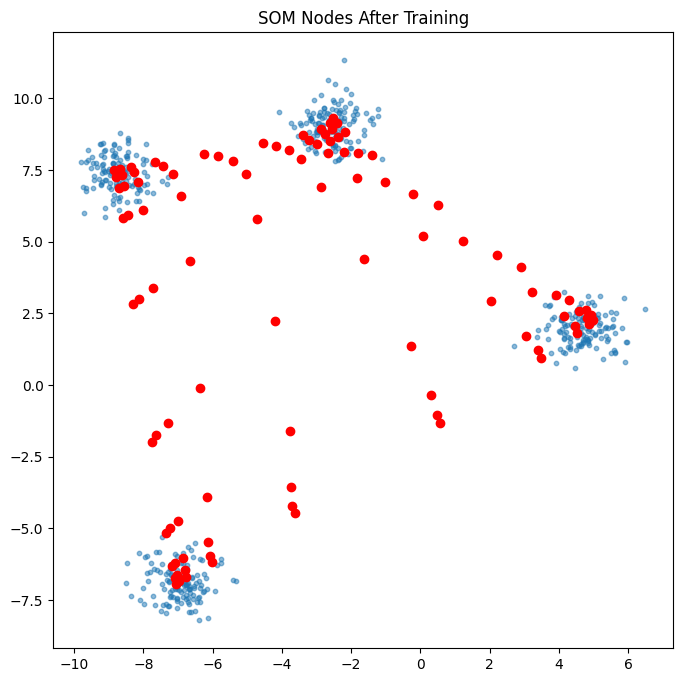

In [43]:
# Visualize our results 
plt.figure(figsize=(8, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

# Plot SOM nodes
weights = som.weights.reshape(-1, 2)
plt.scatter(weights[:, 0], weights[:, 1], c='red')

plt.title("SOM Nodes After Training")
plt.show()

You should see:

* Red nodes arranged over data distribution
* Grid structure roughly following data shape

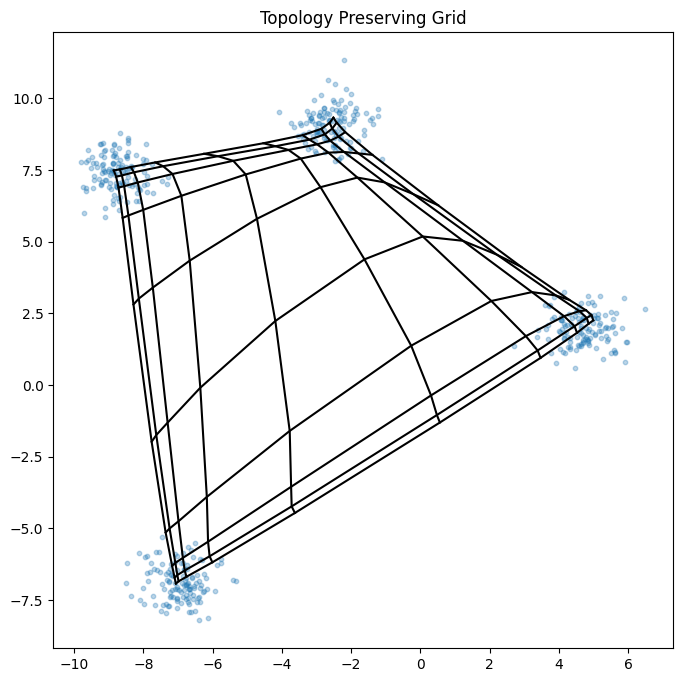

In [44]:
# Visualize the grid structure
plt.figure(figsize=(8, 8))

for i in range(som.m):
    plt.plot(som.weights[i, :, 0], som.weights[i, :, 1], 'k-')

for j in range(som.n):
    plt.plot(som.weights[:, j, 0], som.weights[:, j, 1], 'k-')

plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.3)
plt.title("Topology Preserving Grid")
plt.show()

Now you’ll see:

* A deformed 2D lattice
* Preserved neighborhood relationships

This is topology preservation.

In [45]:
def quantization_error(som, X):
    error = 0
    for x in X:
        bmu = som.find_bmu(x)
        error += np.linalg.norm(x - som.weights[bmu])
    return error / len(X)

print("Quantization Error:", quantization_error(som, X))

Quantization Error: 0.43376132557073666


### What You Just Built

You implemented:
- Competitive learning
- Neighborhood smoothing
- Topology preservation
- Vector quantization

From scratch.

### An Optimized SOM package: MiniSOM

In [46]:
from minisom import MiniSom

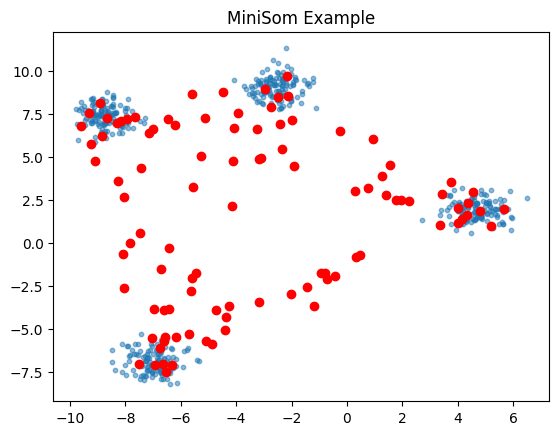

In [47]:
from minisom import MiniSom

som = MiniSom(10,10,2,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X,100)  # 100 iterations

# Visualize nodes
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5)
w = som.get_weights().reshape(-1,2)
plt.scatter(w[:,0], w[:,1], c='red')
plt.title("MiniSom Example")
plt.show()


In [1]:
import cfgrib

test = cfgrib.open_dataset(r"E:\data\data.grib", engine="cfgrib")




In [5]:
for key in test.keys(): 
    print(key)

z
